# Prediction using Supervised ML


# What will be predicted score if a student studies for 9.25 hrs/ day? (simple linear regression task)

# Name: Nyan Lin Htet

In [11]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# Dataset

In [15]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.columns = ['Hours', 'Scores']

data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# plotting the distribution of scores

In [147]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
sb.set_style('whitegrid')

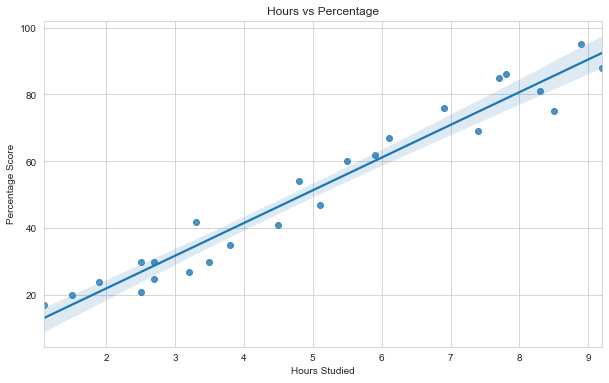

In [148]:
sb.regplot(x='Hours',y='Scores', data=data, scatter=True)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

# checking if there are any outliers

C:\Users\15307\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

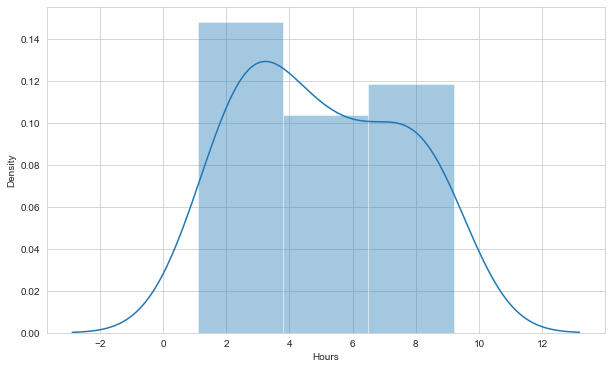

In [149]:
sb.distplot(data.Hours)


C:\Users\15307\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

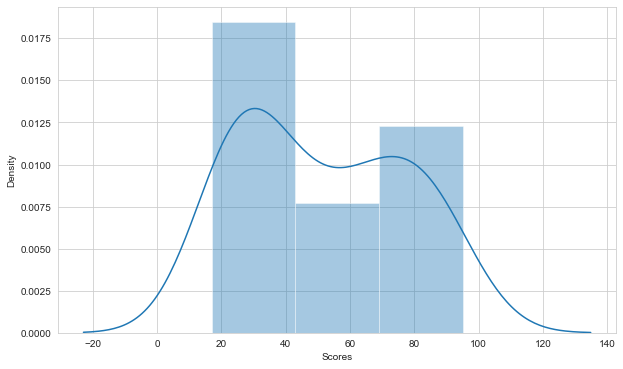

In [150]:
sb.distplot(data.Scores)

In [151]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [152]:
#this tell us that there is a positive correlation, more hours you study scores increased


# Preparing data

In [153]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [154]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [155]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


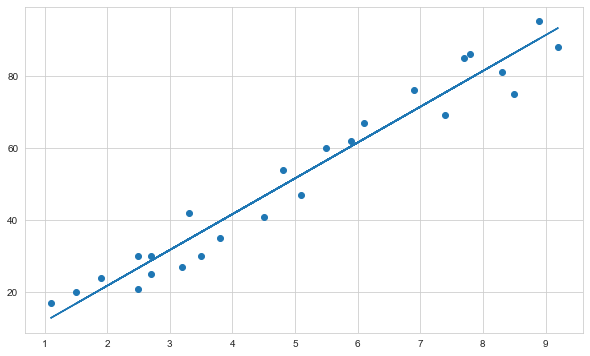

In [156]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [157]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [158]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Solution
The predicted score if a student studies for 9.25hrs/day


In [159]:
hours = [9.25]
own_pr = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pr[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538
